I followed along this amazing data analyst work from Kaggle https://www.kaggle.com/code/likithagedipudi/genz-slang-evolution-tracker-complete-eda

In [44]:
# Importing the necessary files 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from matplotlib import colormaps # colormaps available for matplotlib

# Set the style of the visualizations 
plt.style.use('seaborn-v0_8-whitegrid') # gives the visualizations a white background witha grid
sns.set_palette("husl") # gives a less intenisty variation between the colors
plt.rcParams['figure.figsize'] = (12,6) # setting the standar size of the figures (12 inches wide 6 inches high)
plt.rcParams['font.size'] = 12 # setting font size to 12

In [9]:
# loading the data 
df = pd.read_csv('genz_slang_usage_2020_2025.csv')
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535396 entries, 0 to 535395
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   record_id             535396 non-null  int64  
 1   timestamp             535396 non-null  object 
 2   slang_term            535396 non-null  object 
 3   term_category         535396 non-null  object 
 4   term_meaning          535396 non-null  object 
 5   origin_platform       535396 non-null  object 
 6   usage_platform        535396 non-null  object 
 7   region                535396 non-null  object 
 8   user_id               535396 non-null  object 
 9   user_age_group        535396 non-null  object 
 10  usage_context         535396 non-null  object 
 11  lifecycle_phase       535396 non-null  object 
 12  intensity_score       535396 non-null  float64
 13  sentiment             535396 non-null  object 
 14  sentiment_score       535396 non-null  float64
 15  

In [12]:
# Change timestamp to its correct data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 535396 entries, 0 to 535395
Series name: timestamp
Non-Null Count   Dtype         
--------------   -----         
535396 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


## Slang Term Analysis 

### Most popular Slang Terms 

In [ ]:
top_terms = df['slang_term'].value_counts().head(15) # arranging the 
print(top_terms)

slang_term
slay              19004
based             18541
bussin            17651
rizz              16782
gaslighting       16766
sigma             15630
ate               15626
delulu            15244
snatched          15201
no cap            15107
mid               14642
rent free         14401
brain rot         14324
main character    14324
NPC               14194
Name: count, dtype: int64


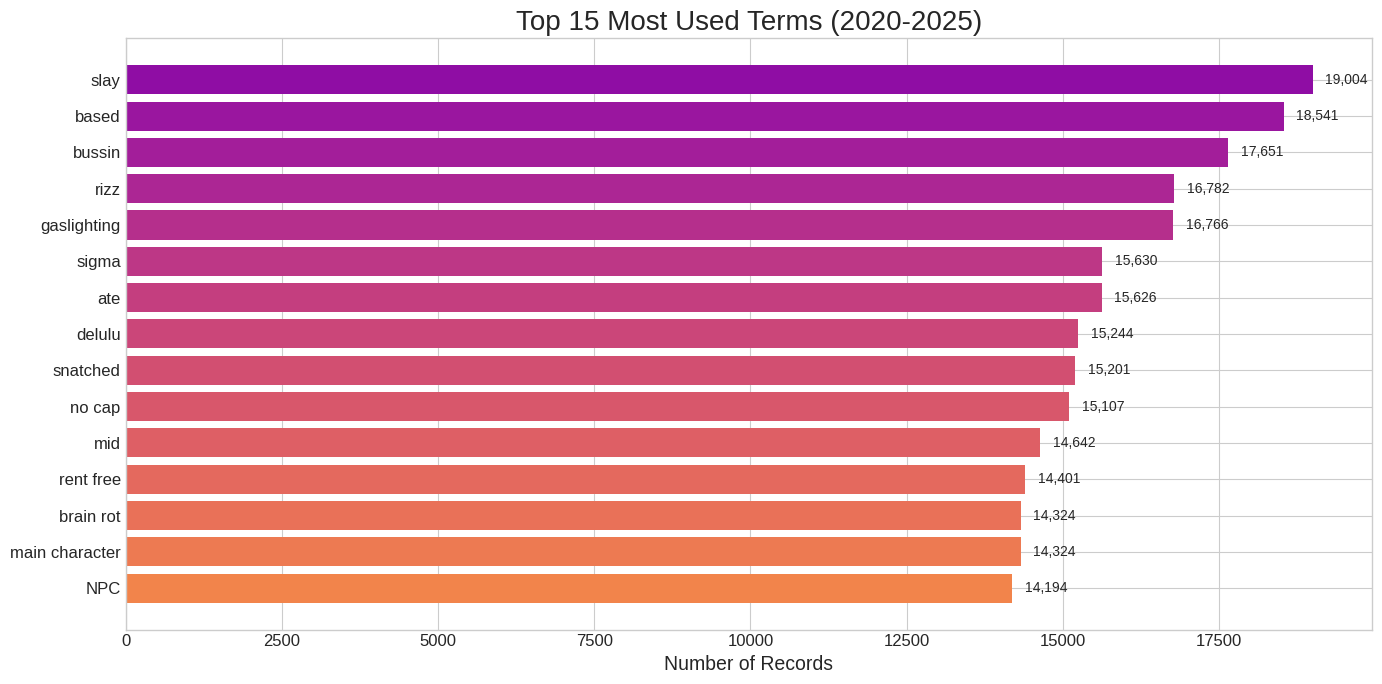

In [62]:
fig, ax = plt.subplots(figsize=(14,7)) # gives the figure's size as 14 inches wide 6 inches high and 
# print(colormaps) # printing out the available color maps available
colors =  plt.cm.plasma_r(np.linspace(0.3,0.7,len(top_terms))) # getting 15 colors from the plasma color map from 30% darkeness to 70% lightness on the scale.
bars = ax.barh(top_terms.index[::-1], top_terms.values[::-1], color=colors) # horizontal bars from leading term to the least in terms of record counts
ax.set_xlabel('Number of Records', fontsize=14) # Label of the x-axis
ax.set_title('Top 15 Most Used Terms (2020-2025)', fontsize=20) # setting the title
# setting the record of each slang next to its bar and at the centre with 
for bar, val in zip(bars, top_terms.values[::-1]):
    ax.text(val + 200, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=10)
plt.tight_layout()
plt.show()